In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [18]:
df=pd.read_csv('customer_purchase_intention.csv')
df.drop("CustomerID",axis=1)

,Age,Gender,DeviceType,TimeOnSite,PageViews,AdClicks,SessionDuration,Country,ReturningVisitor,Purchase
0,56,Female,Desktop,11.72,3,0,30.87,Germany,0,0
1,69,Female,Mobile,4.64,5,1,21.67,Germany,0,0
2,46,Female,Desktop,5.02,13,5,54.86,UK,1,1
3,32,Female,Mobile,10.21,15,9,21.05,India,0,0
4,60,Male,Desktop,15.33,14,4,27.88,UK,1,1
...,...,...,...,...,...,...,...,...,...,...
795,68,Female,Mobile,1.06,18,1,41.95,Germany,0,1
796,22,Male,Mobile,13.16,10,5,11.78,UK,1,1
797,64,Male,Desktop,6.67,9,6,19.82,India,0,1
798,42,Male,Mobile,5.57,8,4,25.52,Canada,0,0


In [19]:
for i in df.select_dtypes(include="object").columns:
    df[i]=LabelEncoder().fit_transform(df[i])
df

,CustomerID,Age,Gender,DeviceType,TimeOnSite,PageViews,AdClicks,SessionDuration,Country,ReturningVisitor,Purchase
0,0,56,0,0,11.72,3,0,30.87,1,0,0
1,1,69,0,1,4.64,5,1,21.67,1,0,0
2,2,46,0,0,5.02,13,5,54.86,3,1,1
3,3,32,0,1,10.21,15,9,21.05,2,0,0
4,4,60,1,0,15.33,14,4,27.88,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...
795,795,68,0,1,1.06,18,1,41.95,1,0,1
796,796,22,1,1,13.16,10,5,11.78,3,1,1
797,797,64,1,0,6.67,9,6,19.82,2,0,1
798,798,42,1,1,5.57,8,4,25.52,0,0,0


In [20]:
x=df[["DeviceType","AdClicks"]]
y=df["Purchase"]

In [21]:
scalar=StandardScaler()
x_scalar=scalar.fit_transform(x)
x_scalar

array([[-1.05428048, -1.55999009],
       [ 0.50472947, -1.21361427],
       [-1.05428048,  0.171889  ],
       ...,
       [-1.05428048,  0.51826482],
       [ 0.50472947, -0.17448682],
       [ 0.50472947, -0.86723845]])

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x_scalar,y,test_size=0.2,random_state=42)

accuracy for kernal linear:68.12%


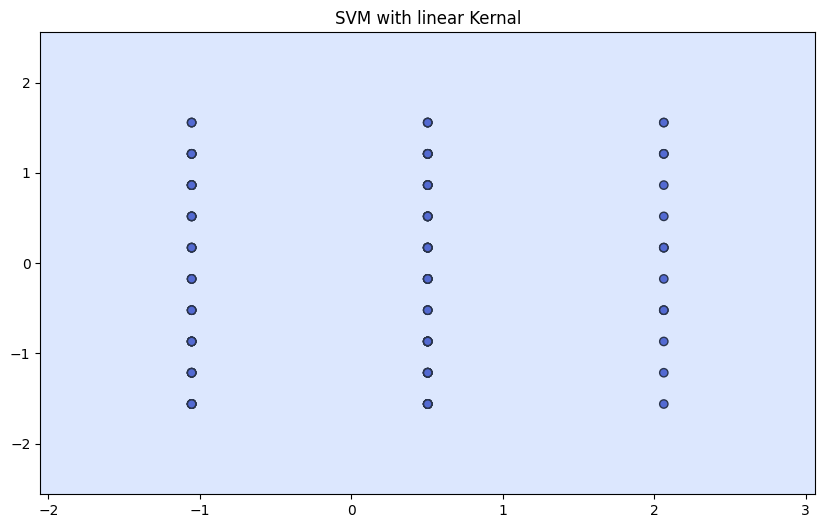

accuracy for kernal poly:68.12%


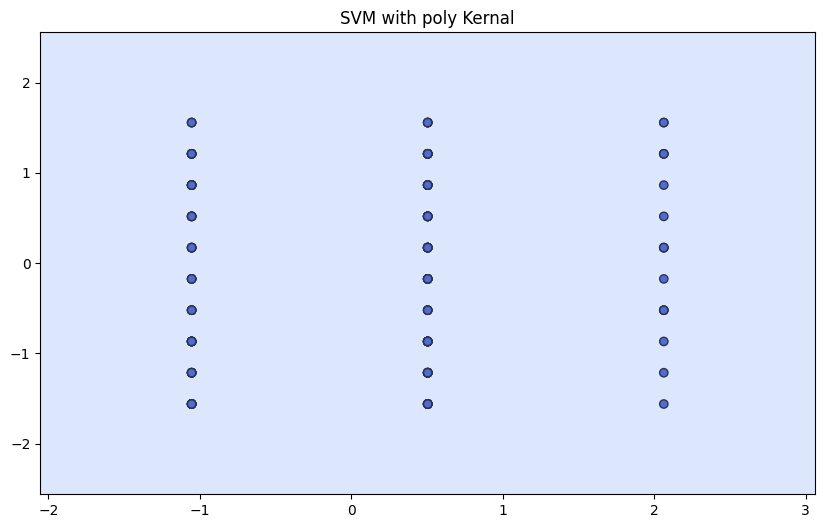

accuracy for kernal rbf:68.12%


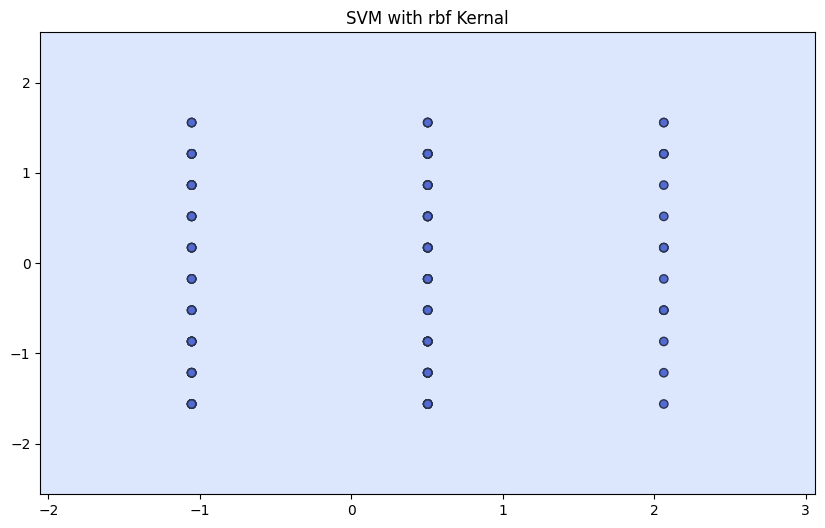

accuracy for kernal sigmoid:63.12%


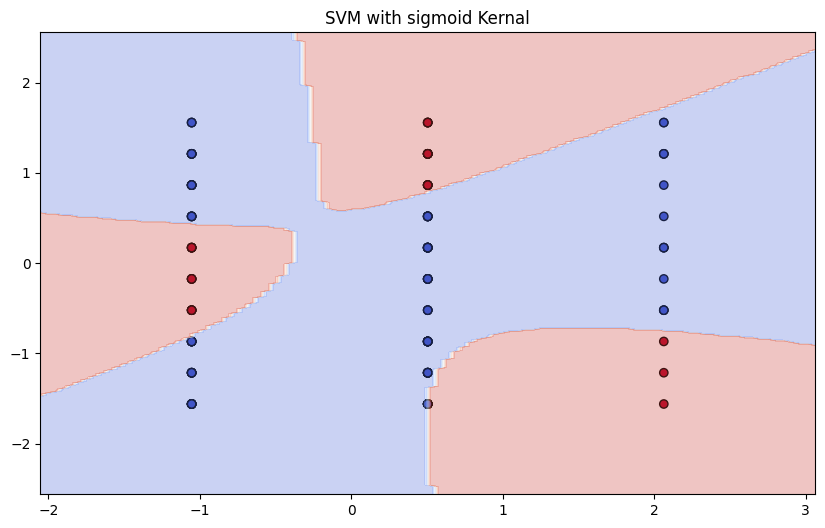

In [23]:
kernal=['linear','poly','rbf','sigmoid']
for i in kernal:
  model=SVC(kernel=i,degree=3,gamma="auto")
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  print(f"accuracy for kernal {i}:{accuracy*100:.2f}%")
  plt.figure(figsize=(10,6))
  plt.scatter(x_test[:,0],x_test[:,1],c=y_pred,cmap='coolwarm',edgecolors='k')
  x_min,x_max=x_test[:,0].min()-1,x_test[:,0].max()+1
  y_min,y_max=x_test[:,1].min()-1,x_test[:,1].max()+1
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,300))
  z=model.predict(np.c_[xx.ravel(),yy.ravel()])
  plt.contourf(xx,yy,z.reshape(xx.shape),alpha=0.3,cmap='coolwarm')
  plt.title(f'SVM with {i} Kernal')

  plt.show()

In [24]:
new_data=pd.DataFrame({"DeviceType":[1],"AdClicks":[1]})
predict=model.predict(scalar.transform(new_data))
predict

array([0])